## This python code was prepared by **Delta Modeling Section**. The ion constituents dataset used in this study were assembled and quality controlled by Tetra Tech.
## Goal: Explore alternative models (including ML) that may outperform the simple regression method in mapping  EC  to ion constituents in the Delta.
## Alternative models: 1- Multiple Linear Regression (MLR), 2- Regression Trees (RT), 3- Random Forest (RF), 4- Gradient Boosting (GB), 5- AdaBoost (AB), 6- Artificial Neural Networks (ANN)

# 1. Import libraries

In [1]:
import math
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import seaborn as sns

# 2. Importing the dataset

### You need to create conda environment was uploaded in Github. "Environment.yml"
### You need to change Ion and data path to simulate ion constituents. Ion = '##' & df = pd.read_csv(##_path)

In [2]:
Alk_path = "inputs/Alkalinity.csv"
Br_path = "inputs/Br.csv"
Ca_path = "inputs/Ca.csv"
Cl_path = "inputs/Cl.csv"
K_path = "inputs/K.csv"
Mg_path = "inputs/Mg.csv"
Na_path = "inputs/Na.csv"
SO4_path = "inputs/SO4.csv"
TDS_path = "inputs/TDS.csv"

Ion = 'Br'

dfANN = pd.read_csv(Br_path)
dfANN = pd.DataFrame(dfANN)
dfANN["Collection Date"] = pd.to_datetime(dfANN["Collection Date"])
dfANN["Long Station Name"] = dfANN["Long Station Name"].astype("category")
dfANN["Location"] = dfANN["Location"].astype("category")
dfANN["Area"] = dfANN["Area"].astype("category")
# dfANN.dropna(subset=["Sacramento X2"], inplace=True)
dfANN["month"] = dfANN["Collection Date"].dt.month_name()
dfANN["month"] = dfANN["month"].astype("category")
dfANN["WYT"] = dfANN["WYT"].astype("category")
dfANN["EC"] = dfANN["EC"].astype("float64")
dfANN[Ion] = dfANN[Ion].astype("float64")

# 3. Splitting the dataset into the Training set and Test set
### &
## Feature Scaling

### In this study, Training and Test datasets were randomly selected (20% Test & 80% Training)

In [4]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(dfANN[['WYT','Location','month']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.concatenate((feature_labels[0], feature_labels[1],feature_labels[2]))
XD = pd.DataFrame(feature_array,columns=feature_labels)
dfmerged=pd.merge(dfANN,XD, left_index=True, right_index=True)
dfmerged.dropna(subset=["Sacramento X2"], inplace=True)

In [5]:
X = dfmerged.loc[:, ['EC', 'Sacramento X2', 'AN', 'BN', 'C', 'D', 'W', 'OMR','SJRcorridor', 'SouthDelta', 'April', 'August', 'December', 'February','January', 'July', 'June', 'March', 'May', 'November', 'October','September']].values
y=dfmerged.iloc[:, 3].values

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=86)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
print('dfANN.shape=',dfANN.shape)
print('dfmerged.shape=',dfmerged.shape)
print('X.shape=',X.shape)
print('XD.shape=',XD.shape)
print('X_Train.shape=',X_train.shape)
print('y_Train.shape=',y_train.shape)
print('X_Test.shape=',X_test.shape)
print('y_Test.shape=',y_test.shape)

dfANN.shape= (948, 9)
dfmerged.shape= (936, 29)
X.shape= (936, 22)
XD.shape= (948, 20)
X_Train.shape= (748, 22)
y_Train.shape= (748,)
X_Test.shape= (188, 22)
y_Test.shape= (188,)


# 4. Alternative Models
### 1- Multiple Linear Regression (MLR), 2- Regression Trees (RT), 3- Random Forest (RF), 4- Gradient Boosting (GB), 5- AdaBoost (AB), 6- Artificial Neural Networks (ANN)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

regressorLinear = LinearRegression()
regressorTree = DecisionTreeRegressor(random_state=0)
regressorRF = RandomForestRegressor(n_estimators=500, random_state=0)
regressorGB = GradientBoostingRegressor()
regressorAB = AdaBoostRegressor()

print(Ion)

regressorLinear.fit(X_train, y_train)
y_pred_test = regressorLinear.predict(X_test)
y_pred_train = regressorLinear.predict(X_train)
y_pred_LR = regressorLinear.predict(X)
y_pred_test_LR = regressorLinear.predict(X_test)
print("LinearRegression:")
print("        ", "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print("        ", "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_test, y_pred_test), ndigits=2), "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))

print("        ", "All    ", "R2 =", round(r2_score(y, y_pred_LR), ndigits=2), "  MAE =", round(
    mean_absolute_error(y, y_pred_LR), ndigits=2), "  MSE =", round(mean_squared_error(y, y_pred_LR), ndigits=2))

print("        ")


regressorTree.fit(X_train, y_train)
y_pred_test = regressorTree.predict(X_test)
y_pred_train = regressorTree.predict(X_train)
y_pred_RT = regressorTree.predict(X)
y_pred_test_RT = regressorTree.predict(X_test)
print("DecisionTreeRegressor:")
print("        ", "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print("        ", "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_test, y_pred_test), ndigits=2), "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))
print("        ", "All    ", "R2 =", round(r2_score(y, y_pred_RT), ndigits=2), "  MAE =", round(
    mean_absolute_error(y, y_pred_RT), ndigits=2), "  MSE =", round(mean_squared_error(y, y_pred_RT), ndigits=2))
print("        ")

regressorRF.fit(X_train, y_train)
y_pred_test = regressorRF.predict(X_test)
y_pred_train = regressorRF.predict(X_train)
y_pred_RF = regressorRF.predict(X)
y_pred_test_RF = regressorRF.predict(X_test)
print("Random Forest:")
print("        ", "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print("        ", "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_test, y_pred_test), ndigits=2), "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))
print("        ", "All    ", "R2 =", round(r2_score(y, y_pred_RF), ndigits=2), "  MAE =", round(
    mean_absolute_error(y, y_pred_RF), ndigits=2), "  MSE =", round(mean_squared_error(y, y_pred_RF), ndigits=2))
print("        ")

regressorGB.fit(X_train, y_train)
y_pred_test = regressorGB.predict(X_test)
y_pred_train = regressorGB.predict(X_train)
y_pred_GB = regressorGB.predict(X)
y_pred_test_GB = regressorGB.predict(X_test)
print("GradientBoosting:")
print("        ", "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print("        ", "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_test, y_pred_test), ndigits=2), "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))
print("        ", "All    ", "R2 =", round(r2_score(y, y_pred_GB), ndigits=2), "  MAE =", round(
    mean_absolute_error(y, y_pred_GB), ndigits=2), "  MSE =", round(mean_squared_error(y, y_pred_GB), ndigits=2))
print("        ")

regressorAB.fit(X_train, y_train)
y_pred_test = regressorAB.predict(X_test)
y_pred_train = regressorAB.predict(X_train)
y_pred_AB = regressorAB.predict(X)
y_pred_test_AB = regressorAB.predict(X_test)
print("Adaboost:")
print("        ", "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print("        ", "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2), "  MAE =", round(
    mean_absolute_error(y_test, y_pred_test), ndigits=2), "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))
print("        ", "All    ", "R2 =", round(r2_score(y, y_pred_AB), ndigits=2), "  MAE =", round(
    mean_absolute_error(y, y_pred_AB), ndigits=2), "  MSE =", round(mean_squared_error(y, y_pred_AB), ndigits=2))
print("        ")


Br
LinearRegression:
         Training R2 = 0.87   MAE = 0.05   MSE = 0.01
         Test     R2 = 0.88   MAE = 0.05   MSE = 0.0
         All     R2 = 0.88   MAE = 0.05   MSE = 0.0
        
DecisionTreeRegressor:
         Training R2 = 1.0   MAE = 0.0   MSE = 0.0
         Test     R2 = 0.9   MAE = 0.03   MSE = 0.0
         All     R2 = 0.98   MAE = 0.01   MSE = 0.0
        
Random Forest:
         Training R2 = 0.99   MAE = 0.01   MSE = 0.0
         Test     R2 = 0.96   MAE = 0.02   MSE = 0.0
         All     R2 = 0.98   MAE = 0.02   MSE = 0.0
        
GradientBoosting:
         Training R2 = 0.97   MAE = 0.03   MSE = 0.0
         Test     R2 = 0.95   MAE = 0.03   MSE = 0.0
         All     R2 = 0.97   MAE = 0.03   MSE = 0.0
        
Adaboost:
         Training R2 = 0.92   MAE = 0.05   MSE = 0.0
         Test     R2 = 0.91   MAE = 0.04   MSE = 0.0
         All     R2 = 0.92   MAE = 0.04   MSE = 0.0
        


# ANN

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=22, activation='ELU'))
ann.add(tf.keras.layers.Dense(units=30, activation='ELU'))
ann.add(tf.keras.layers.Dense(units=30, activation='ELU'))
ann.add(tf.keras.layers.Dense(units=30, activation='ELU'))
ann.add(tf.keras.layers.Dense(units=30, activation='ELU'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer=keras.optimizers.Adamax(
    learning_rate=0.001), loss="mse", metrics=['accuracy'])
history = ann.fit(X_train, y_train, validation_split=0.33,
                  batch_size=16, epochs=200)

y_pred_test = ann.predict(X_test)
y_pred_train = ann.predict(X_train)


print(Ion, "Training", "R2 =", round(r2_score(y_train, y_pred_train), ndigits=2), "  MAE =", round(mean_absolute_error(
    y_train, y_pred_train), ndigits=2), "  MSE =", round(mean_squared_error(y_train, y_pred_train), ndigits=2))
print(Ion, "Test    ", "R2 =", round(r2_score(y_test, y_pred_test), ndigits=2),  "  MAE =", round(mean_absolute_error(
    y_test, y_pred_test), ndigits=2),  "  MSE =", round(mean_squared_error(y_test, y_pred_test), ndigits=2))

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 0.0468 - accuracy: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.0000e+00 - val_loss: 0.0147 - val_accuracy: 0.0000e+00
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - v

In [9]:
y_pred_ANN = ann.predict(X)
dfmerged['ANN'] = y_pred_ANN
dfmerged['LR'] = y_pred_LR
dfmerged['RT'] = y_pred_RT
dfmerged['RF'] = y_pred_RF
dfmerged['GB'] = y_pred_GB
dfmerged['AB'] = y_pred_AB

30/30 [==============================] - 0s 862us/step


c:\Users\peymanhn\Anaconda3\envs\ion_ml\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.

c:\Users\peymanhn\Anaconda3\envs\ion_ml\lib\site-packages\ipykernel_launcher.py:23: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.

c:\Users\peymanhn\Anaconda3\envs\ion_ml\lib\site-packages\ipykernel_launcher.py:32: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.

c:\Users\peymanhn\Anaconda3\envs\ion_ml\lib\site-packages\ipykernel_launcher.py:41: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.

c:\Users\peymanhn\Anacon

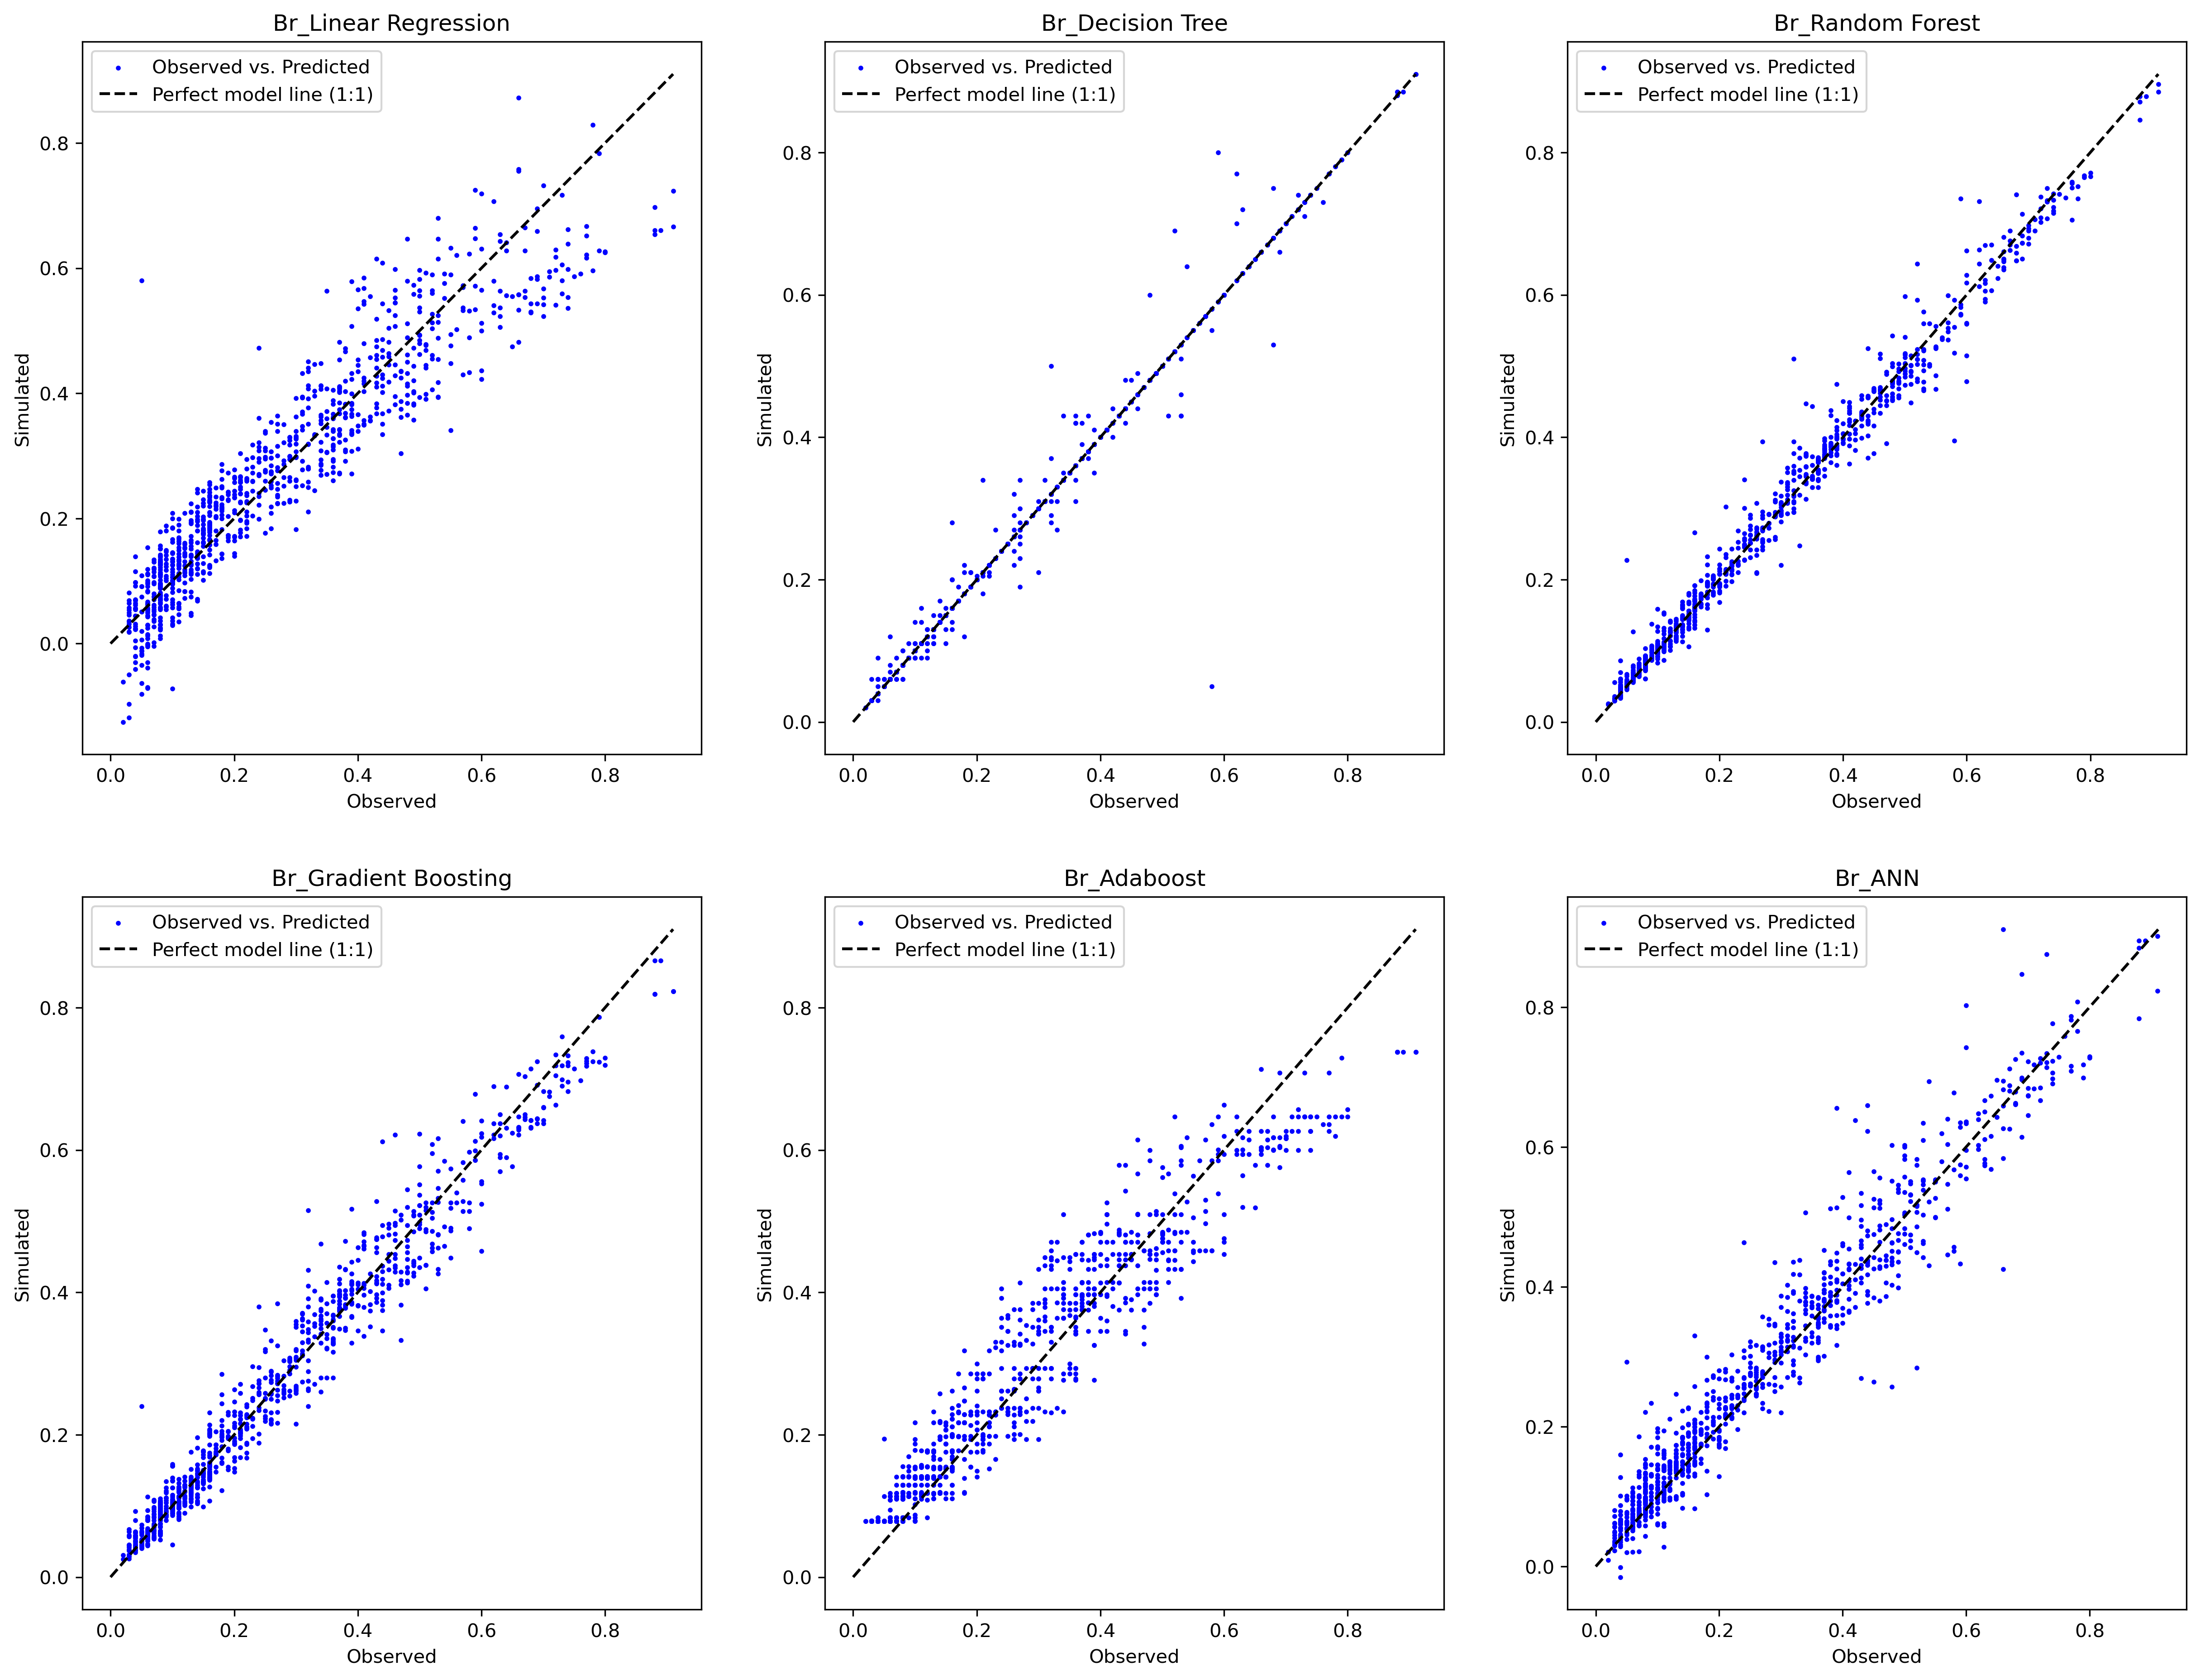

In [11]:
df=dfmerged
Max = df[Ion].max()
MaxANN=df['ANN'].max()



fig, axes=plt.subplots(2,3,figsize=(20,15),dpi=300)


axes[0,0].scatter(df[Ion], df['LR'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[0,0].plot((0, Max), (0, Max), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[0,0].set_xlabel('Observed')
axes[0,0].set_ylabel('Simulated')
axes[0,0].set_title(Ion + '_Linear Regression')
axes[0,0].legend(loc=0)


axes[0,1].scatter(df[Ion], df['RT'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[0,1].plot((0, Max), (0, Max), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[0,1].set_xlabel('Observed')
axes[0,1].set_ylabel('Simulated')
axes[0,1].set_title(Ion + '_Decision Tree')
axes[0,1].legend(loc=0)

axes[0,2].scatter(df[Ion], df['RF'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[0,2].plot((0, Max), (0, Max), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[0,2].set_xlabel('Observed')
axes[0,2].set_ylabel('Simulated')
axes[0,2].set_title(Ion + '_Random Forest')
axes[0,2].legend(loc=0)

axes[1,0].scatter(df[Ion], df['GB'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[1,0].plot((0, Max), (0, Max), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[1,0].set_xlabel('Observed')
axes[1,0].set_ylabel('Simulated')
axes[1,0].set_title(Ion + '_Gradient Boosting')
axes[1,0].legend(loc=0)

axes[1,1].scatter(df[Ion], df['AB'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[1,1].plot((0, Max), (0, Max), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[1,1].set_xlabel('Observed')
axes[1,1].set_ylabel('Simulated')
axes[1,1].set_title(Ion + '_Adaboost')
axes[1,1].legend(loc=0)

axes[1,2].scatter(df[Ion], df['ANN'], color='blue',
            label="Observed vs. Predicted",s=2.5)
axes[1,2].plot((0, MaxANN), (0, MaxANN), 'b--',
         label="Perfect model line (1:1)", color='black')
axes[1,2].set_xlabel('Observed')
axes[1,2].set_ylabel('Simulated')
axes[1,2].set_title(Ion + '_ANN')
axes[1,2].legend(loc=0)